In [1]:
%env SPOTIPY_CLIENT_ID=f05eb6e938df45debd993c0c73cfcd0d
%env SPOTIPY_CLIENT_SECRET=a7b1558079cd4354938f057b24523750
%matplotlib inline

env: SPOTIPY_CLIENT_ID=f05eb6e938df45debd993c0c73cfcd0d
env: SPOTIPY_CLIENT_SECRET=a7b1558079cd4354938f057b24523750


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib.request
import io
import IPython
from pydub import AudioSegment

In [3]:
class SpotifyRandomClip():
    def __init__(self, playlist_uri, num_songs, clip_length):
        self.playlist_uri = playlist_uri
        self.num_songs = num_songs
        self.clip_length = clip_length
        
    def randomize_songs(self):
        self.songs = self.get_random_songs()
        
    def get_random_songs(self):
        playlist_songs = spotify.playlist_tracks(self.playlist_uri, fields='items', limit=100)
        playlist_songs = np.random.choice(playlist_songs['items'], 100, replace=False)
        songs = []
        for song in playlist_songs:
            while len(songs) < num_songs:
                if song['track']['preview_url']:
                    songs.append(song)
                break
        return songs
    
    def print_song_info(self, song_info):
        song_name = song_info['track']['name']
        artist_name = song_info['track']['artists'][0]['name']
        album_name = song_info['track']['album']['name']
        release_date = song_info['track']['album']['release_date']
        print("{artist_name} - {song_name} // {album_name} ({release_date})".format(
        artist_name = artist_name,
        song_name = song_name,
        album_name = album_name,
        release_date = release_date))
        
    def plot_album_cover(self, song_info):
        URL = song_info['track']['album']['images'][0]['url']
        with urllib.request.urlopen(URL) as url:
            f = io.BytesIO(url.read())
        cover = Image.open(f)
        plt.figure()
        plt.imshow(np.asarray(cover))
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    def get_song_clip(self, song_info):
        URL = song_info['track']['preview_url']
        with urllib.request.urlopen(URL) as url:
            f = io.BytesIO(url.read())
        song = AudioSegment.from_mp3(f)
        song_clip = song[:self.clip_length*1000]
        if not os.path.exists('./tmp'):
            os.mkdir('./tmp/')
        song_clip.export('./tmp/temp.mp3', 'mp3')
        song_clip = IPython.display.Audio('./tmp/temp.mp3')
        return song_clip
    
    def return_song_clips(self):
        for i, song in enumerate(self.songs):
            print("Song clip {}".format(i+1))
            song_clip = self.get_song_clip(song)
            IPython.display.display(song_clip)
            
    def reveal_answers(self):
        for i, song in enumerate(self.songs):
            print("Answer for clip {} : ".format(i+1))
            self.print_song_info(song)
            self.plot_album_cover(song)

In [4]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

In [5]:
playlist_uri = 'spotify:playlist:3OaptsUH4DcdoYRqYuS7JU'
num_songs = 5
clip_length = 2

In [8]:
random_clips_generator = SpotifyRandomClip(playlist_uri, num_songs, clip_length)

In [9]:
random_clips_generator.randomize_songs()
random_clips_generator.return_song_clips()

Song clip 1


Song clip 2


Song clip 3


Song clip 4


Song clip 5


Answer for clip 1 : 
The Breeders - Cannonball // Last Splash (1993-08-30)


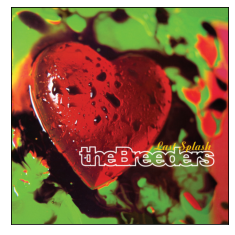

Answer for clip 2 : 
Alex G - Sandy // Rules (2012-01-15)


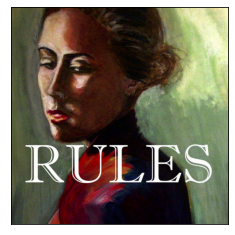

Answer for clip 3 : 
Chairlift - Evident Utensil // Does You Inspire You (2008)


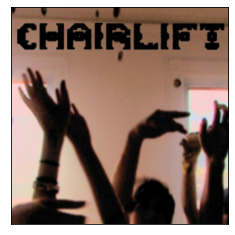

Answer for clip 4 : 
Hop Along - How Simple // Bark Your Head Off, Dog (2018-04-06)


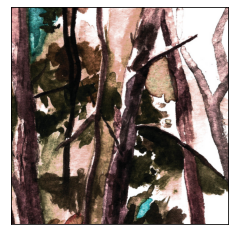

Answer for clip 5 : 
of Montreal - A Sentence Of Sorts In Kongsvinger // Hissing Fauna, Are You The Destroyer? (2007-01-23)


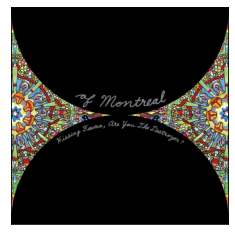

In [10]:
random_clips_generator.reveal_answers()